In [1]:
from PIL import Image
from pylab import *
"""
value = im[i,j,k]
im[i,:] = im[j,:] # set the values of row i with values from row j
im[:,i] = 100 # set all values in column i to 100
im[:100,:50].sum() # the sum of the values of the first 100 rows and 50 columns
im[50:100,50:100] # rows 50-100, columns 50-100 (100th not included)
im[i].mean() # average of row i
im[:,-1] # last column
im[-2,:] (or im[-2]) # second to last row
"""

'\nvalue = im[i,j,k]\nim[i,:] = im[j,:] # set the values of row i with values from row j\nim[:,i] = 100 # set all values in column i to 100\nim[:100,:50].sum() # the sum of the values of the first 100 rows and 50 columns\nim[50:100,50:100] # rows 50-100, columns 50-100 (100th not included)\nim[i].mean() # average of row i\nim[:,-1] # last column\nim[-2,:] (or im[-2]) # second to last row\n'

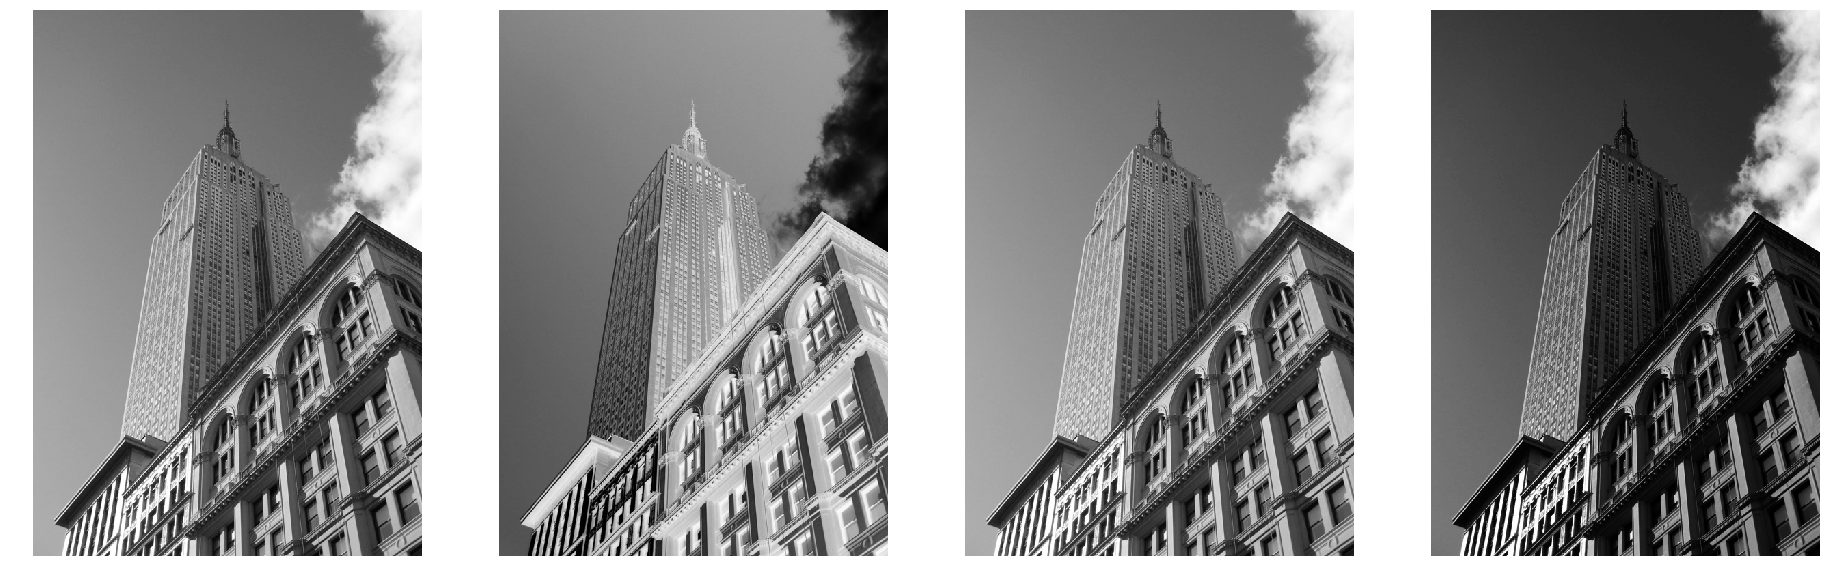

In [3]:
im = array(Image.open('data/empire.jpg').convert('L'))
im2 = 255 - im #invert image
im3 = (100.0/255) * im + 100 #clamp to interval 100...200
im4 = 255.0 * (im/255.0)**2 #squared
fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(im)
axs[0].axis('off')
axs[1].imshow(im2)
axs[1].axis('off')
axs[2].imshow(im3)
axs[2].axis('off')
axs[3].imshow(im4)
axs[3].axis('off')
gray()
show()

In [4]:
def histeq(im,nbr_bins=256):
    """ Histogram equalization of a grayscale image. """
    # get image histogram
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape), cdf

In [5]:
im2,cdf = histeq(im)

C:\Users\Laboratory\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


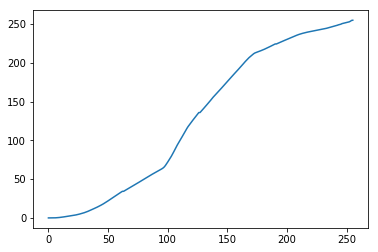

In [6]:
figure()
plot(cdf)
show()

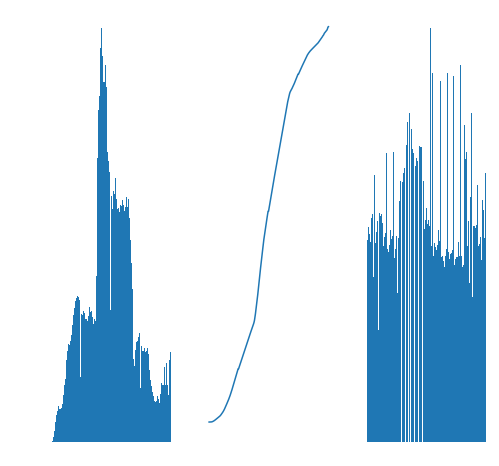

In [7]:
fig, axs = subplots(1, 3, figsize=(8, 8))
axs[0].hist(im.flatten(),128)
axs[0].axis('off')
axs[1].plot(cdf)
axs[1].axis('off')
axs[2].hist(im2.flatten(),128)
axs[2].axis('off')
show()

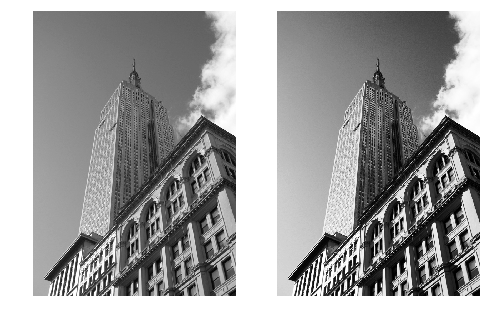

In [8]:
fig, axs = subplots(1, 2, figsize=(8, 8))
axs[0].imshow(im)
axs[0].axis('off')
axs[1].imshow(im2)
axs[1].axis('off')
show()

In [9]:
def compute_average(imlist):
    """ Compute the average of a list of images. """
    # open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print(imname + '...skipped')
    averageim /= len(imlist)
    # return average as uint8
    return array(averageim, 'uint8')

In [2]:
from PIL import Image
from pylab import *
from numpy import *
from PCV.tools import imtools, pca

# Get list of images and their size
imlist = imtools.get_imlist('./data/fontimages/a_thumbs/') # fontimages.zip is part of the book data set
im = array(Image.open(imlist[0])) # open one image to get the size 
m,n = im.shape[:2]

# Create matrix to store all flattened images
immatrix = array([array(Image.open(imname)).flatten() for imname in imlist],'f')

# Perform PCA
V,S,immean = pca.pca(immatrix)

# Show the images (mean and 7 first modes)
# This gives figure 1-8 (p15) in the book.
figure()
gray()
subplot(2,4,1)
imshow(immean.reshape(m,n))
for i in range(7):
    subplot(2,4,i+2)
    imshow(V[i].reshape(m,n))
show()


ModuleNotFoundError: No module named 'PCV'

##### imlist = imtools.get_imlist('./data/fontimages/a_thumbs/') # fontimages.zip is part of the book data set
imlist = imtools.get_imlist('./data/img_align_celeba/') # fontimages.zip is part of the book data set
avg = compute_average(imlist)
figure()
imshow(avg)
show()